In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install bertopic[visualization]

In [ ]:
import json
from bertopic import BERTopic
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

## **Modelo sin preprocesamiento**

Leer Tweets extraídos

In [ ]:
def extraer_cuentas_y_twets_usuarios_json(lista_cuentas, lista_tweets, diccionario_tweets):
    with open("tweets.json", 'r') as fp:
        diccionario_tweets = json.load(fp)
        for i in range(len(diccionario_tweets['data'].keys())):
            lista_cuentas.append(diccionario_tweets['includes'][str(i)])
            lista_tweets.append(diccionario_tweets['data'][str(i)]['text'])

        print('Cantidad: ',len(lista_cuentas))
        return len(diccionario_tweets['data'])

In [ ]:
with open("tweets.json") as fp:
    diccionario_tweets = json.load(fp)

In [ ]:
cuentas_usuarios = []
tweets = []
diccionario_tweets = {'data':{}, 'includes':{}}
extraer_cuentas_y_twets_usuarios_json(cuentas_usuarios, tweets, diccionario_tweets)

Cantidad:  9788


9788

In [ ]:
tweets[0]

'quiero llorar d lo mal q m siento'

In [ ]:
model = BERTopic(language='spanish', calculate_probabilities=True)
topics, probabilities = model.fit_transform(tweets)

In [ ]:
model.get_topic_freq().head()

,Topic,Count
0,-1,3728
1,0,493
2,1,285
3,2,283
4,3,261


In [ ]:
model.get_topic(0)

[('llorar', 0.04684933608403646),
 ('quiero', 0.028799660782294123),
 ('ganas', 0.020444276852154383),
 ('voy', 0.019564912859642538),
 ('me', 0.017088101477124414),
 ('no', 0.012548769000308218),
 ('tengo', 0.012371572783326694),
 ('mi', 0.011268978496563355),
 ('de', 0.010785946406115852),
 ('en', 0.010446747144097367)]

In [ ]:
model.save("my_model")

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution(probabilities[0])

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [ ]:
nombre_archivo_clasificacion = "clasificacion.txt"

In [ ]:
contenido = list()
with open(nombre_archivo_clasificacion, 'r+') as archivo:
    contenido = archivo.readlines()

In [ ]:
contenido

In [ ]:
cont = int(contenido.pop())
problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [ ]:
problemas_mentales = np.asarray(problemas_mentales)

In [ ]:
sum(problemas_mentales)

In [ ]:
topicos_documentos_clasificados = model.topics_[:cont]

In [ ]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [ ]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [ ]:
len(topicos_documentos_depresivos)

In [ ]:
topicos_documentos_depresivos

In [ ]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

In [ ]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [ ]:
model.get_topic(1)

Ver el tamaño de los topicos

In [ ]:
model.topic_sizes_

Porcentaje de comentarios con transtorno por tópico

In [ ]:
from collections import Counter

counter = Counter(topicos_documentos_depresivos_limpio)

In [ ]:
counter

In [ ]:
cantidad_documentos_por_topico = model.topic_sizes_

In [ ]:
topicos_con_transtorno = list(counter.keys())

In [ ]:
topicos_con_transtorno

In [ ]:
for i in topicos_con_transtorno:
  print("{:<5} {:>5.2f}%".format(i, (counter[i] / cantidad_documentos_por_topico[i])*100))

In [ ]:
model.get_topic(102)

In [ ]:
model.get_topic(6)

## **Ahora voy a crear otro modelo con palabras y cosas básicas corregidas**

In [ ]:
import pandas as pd

df = pd.read_csv("processed_tweets.csv")
df.head()

In [ ]:
model2 = BERTopic(language='spanish', calculate_probabilities=True)
topics2, probabilities2 = model2.fit_transform(df['Comentarios'])

In [ ]:
model2.get_topic_freq().head()

In [ ]:
model2.save("my_model_2")

In [ ]:
model2.visualize_topics()

In [ ]:
model2.visualize_distribution(probabilities2[0])

In [ ]:
model2.reduce_topics(df['Comentarios'], nr_topics=60)

In [ ]:
model2.visualize_topics()

## **Ahora voy a crear otro modelo con preprocesamiento total**

In [229]:
#df2 = pd.read_csv("totally_processed_tweets.csv")
df2 = pd.read_csv("totally_processed_tweets_well_complete.csv")
df2.head()

,Unnamed: 0,Comentarios,Depresivo,TweetPre,Idioma
0,7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
1,8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
2,14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
3,16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
4,28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [230]:
df2['TweetPre'].isnull().sum()

0

In [231]:
len(df2)

1038

In [232]:
#df2 = df2.iloc[0:5000]

In [233]:
len(df2)

1038

In [234]:
df2.describe()

,Unnamed: 0,Depresivo
count,1038.000000,1038.000000
mean,639.231214,0.318882
std,462.459698,0.466268
min,2.000000,0.000000
25%,275.500000,0.000000
50%,565.500000,0.000000
75%,863.500000,1.000000
max,2060.000000,1.000000


In [235]:
model3 = BERTopic(language='spanish', calculate_probabilities=True)
model3.fit_transform(list(df2[df2['TweetPre'].notnull()]['TweetPre']))

([0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,


In [236]:
topics3, probabilities3 = model3.topics_, model3.probabilities_

In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1038 non-null   int64 
 1   Comentarios  1038 non-null   object
 2   Depresivo    1038 non-null   int64 
 3   TweetPre     1038 non-null   object
 4   Idioma       1038 non-null   object
dtypes: int64(2), object(3)
memory usage: 40.7+ KB


In [238]:
df2.head()

,Unnamed: 0,Comentarios,Depresivo,TweetPre,Idioma
0,7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
1,8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
2,14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
3,16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
4,28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [239]:
model3.get_topic_freq().head()

,Topic,Count
0,0,647
1,1,351
2,2,28
3,3,12


In [240]:
#model3.save("my_model_3")

In [241]:
model3.visualize_topics()

In [242]:
model3.visualize_distribution(probabilities3[0])

In [243]:
model3.reduce_topics(list(df2[df2['TweetPre'].notnull()]['TweetPre']), nr_topics=20)

In [244]:
topics3, probabilities3 = model3.topics_, model3.probabilities_

In [245]:
model3.visualize_topics()

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [246]:
#nombre_archivo_clasificacion = "clasificacion.txt"

In [247]:
#contenido = list()
#with open(nombre_archivo_clasificacion, 'r+') as archivo:
#    contenido = archivo.readlines()

In [248]:
#contenido

In [249]:
#cont = int(contenido.pop())
#problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [250]:
problemas_mentales = np.asarray(df2['Depresivo'])

In [251]:
cont = len(problemas_mentales)
cont

1038

In [252]:
len(model3.topics_)

1038

In [253]:
topicos_documentos_clasificados = model3.topics_[:cont]

In [254]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [255]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [256]:
len(topicos_documentos_depresivos)

331

In [257]:
topicos_documentos_depresivos

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [258]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

<function matplotlib.pyplot.show(*args, **kw)>

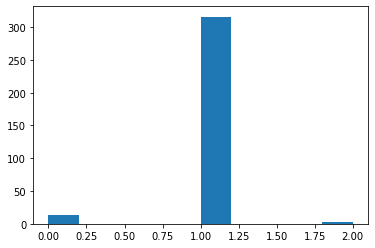

In [259]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [260]:
#model3.get_topic(1)

Ver el tamaño de los topicos

In [261]:
model3.topic_sizes_

{0: 647, 1: 351, 2: 28, 3: 12}

Porcentaje de comentarios con transtorno por tópico

In [262]:
from collections import Counter

counter = Counter(topicos_documentos_depresivos_limpio)

In [263]:
counter

Counter({0: 13, 1: 316, 2: 2})

In [264]:
cantidad_documentos_por_topico = model3.topic_sizes_

In [265]:
topicos_con_transtorno = list(counter.keys())

In [266]:
topicos_con_transtorno

[0, 1, 2]

In [267]:
for i in topicos_con_transtorno:
  print("{:<5} {:>5.2f}%".format(i, (counter[i] / cantidad_documentos_por_topico[i])*100))

0      2.01%
1     90.03%
2      7.14%


In [268]:
model3.get_topic(1)

[('ansiedad', 0.15860904051656505),
 ('depresion', 0.07644619286112372),
 ('ma', 0.04091236659660392),
 ('dia', 0.037413335420056114),
 ('si', 0.032187724537735364),
 ('solo', 0.03131500754672271),
 ('quiero', 0.029493970914355582),
 ('hoy', 0.027141639678539678),
 ('vida', 0.02705541472563997),
 ('tan', 0.02477493556805869)]

In [269]:
model3.get_topic(3)

[('lavanda', 0.6574332575090428),
 ('siempre', 0.531185899116405),
 ('ticket', 0.37570142844982646),
 ('cines', 0.37570142844982646),
 ('panteranegra', 0.37570142844982646),
 ('consigue', 0.37570142844982646),
 ('espera', 0.3685483935573712),
 ('serum', 0.36524069861613495),
 ('ahora', 0.283894212232999),
 ('hoy', 0.2685634403419139)]

## **Ahora voy a implementar lo realizado en los papers**
Voy a usar los embedings de BERTopic y los embedings normales.

In [270]:
len(probabilities3)

1038

In [271]:
datos = df2['Comentarios']
datos.head()

0                                 Estoy ansioso nea 💔🔥
1    Tw: s4ngr3 \nUna de las cosas que odio cuando ...
2    Necesito un estómago nuevo o aprender a ser me...
3    @Elenaruemorgue Ninguno oficial (no vaya a ser...
4    Si algún día me gana la depresión y me voy, qu...
Name: Comentarios, dtype: object

In [272]:
datos = [i.split(' ') for i in datos]

In [273]:
datos[0:2]

[['Estoy', 'ansioso', 'nea', '💔🔥'],
 ['Tw:',
  's4ngr3',
  '\nUna',
  'de',
  'las',
  'cosas',
  'que',
  'odio',
  'cuando',
  'me',
  'viene',
  'mucha',
  'ansiedad',
  'es',
  'terminar',
  'con',
  'la',
  'piel,',
  'labios,...',
  'En',
  'la',
  'mierda',
  '\nOsea',
  'en',
  'la',
  'siguiente',
  'foto',
  'mi',
  'labio',
  'con',
  'otra',
  'herida',
  'añadida',
  'a',
  'la',
  'lista',
  '😭']]

In [277]:
w2v_model = Word2Vec(min_count=1, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)
#w2v_model = Word2Vec(min_count=1, window=1, vector_size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007)
w2v_model.build_vocab(datos, progress_per=10000)
w2v_model.train(datos, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(301899, 566430)

In [278]:
model1 = Word2Vec(datos, min_count = 1, window = 5, sg=0) 

In [279]:
average_vectors = []
for d in datos:
    v = np.zeros(26)
    for word in d:
        v += w2v_model.wv[word]
    average_vectors.append(list(v / len(d)))

In [280]:
len(average_vectors)

1038

In [281]:
len(probabilities3)

1038

### Ahora si puedo combinar los vectores y pasarlos a un algoritmo de ML

En el paper árabe dicen que los unen, usando FeatureUnion

In [282]:
#from sklearn.pipeline import FeatureUnion

In [283]:
#union = FeatureUnion([("Word2Vec",  Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)),
#                       ("BERTopic", BERTopic(language='spanish', calculate_probabilities=True))])

In [284]:
combinacion = []
for i in range(len(probabilities3)):
    average_vectors[i].extend(probabilities3[i])
    combinacion.append(average_vectors[i])

In [285]:
len(combinacion)

1038

In [286]:
clases = df2['Depresivo']
clases

0       1
1       1
2       1
3       1
4       1
       ..
1033    0
1034    0
1035    0
1036    0
1037    0
Name: Depresivo, Length: 1038, dtype: int64

In [287]:
sum(clases)

331

In [288]:
dataset = pd.DataFrame({'Vectores': combinacion, 'Clase': clases})
dataset.head()

,Vectores,Clase
0,"[-0.0018373374768998474, 0.12792470958083868, ...",1
1,"[-0.03637378615039288, 0.31969228366742264, -0...",1
2,"[-0.03159951643707851, 0.27232693433761596, -0...",1
3,"[-0.030093363983641295, 0.28656438924372196, -...",1
4,"[-0.043061954922796714, 0.3465636315799895, -0...",1


In [289]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn import metrics

In [290]:
X_train,X_test,y_train,y_test = train_test_split(dataset['Vectores'], dataset['Clase'],test_size = 0.2,)#random_state = 324)

In [291]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(list(X_train), y_train)

SVC(kernel='linear')

In [292]:
prediction_linear_train = classifier_linear.predict(list(X_train))
# results
print(classification_report(y_train, prediction_linear_train))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       562
           1       0.90      0.96      0.93       268

    accuracy                           0.95       830
   macro avg       0.94      0.96      0.95       830
weighted avg       0.95      0.95      0.95       830



[[533  29]
 [ 10 258]]


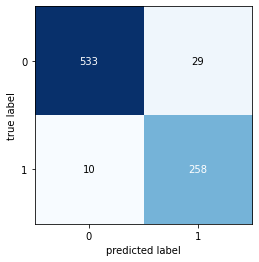

In [293]:
cf = metrics.confusion_matrix(y_train,prediction_linear_train,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [294]:
prediction_linear_test = classifier_linear.predict(list(X_test))
# results
print(classification_report(y_test, prediction_linear_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       145
           1       0.91      0.92      0.91        63

    accuracy                           0.95       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.95      0.95      0.95       208



[[139   6]
 [  5  58]]


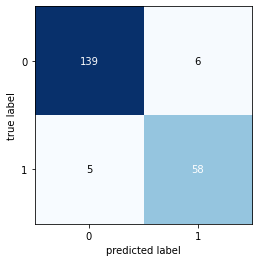

In [295]:
cf = metrics.confusion_matrix(y_test,prediction_linear_test,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Ahora veré cómo funcionan solo con los embeddings

In [296]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(average_vectors, dataset['Clase'],test_size = 0.2,random_state = 324)

In [297]:
# Perform classification with SVM, kernel=linear
classifier_linear2 = svm.SVC(kernel='linear')
classifier_linear2.fit(list(X_train2), y_train2)

SVC(kernel='linear')

In [298]:
prediction_linear_train2 = classifier_linear2.predict(list(X_train2))
# results
print(classification_report(y_train2, prediction_linear_train2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       564
           1       0.91      0.95      0.93       266

    accuracy                           0.95       830
   macro avg       0.94      0.95      0.95       830
weighted avg       0.95      0.95      0.95       830



[[538  26]
 [ 13 253]]


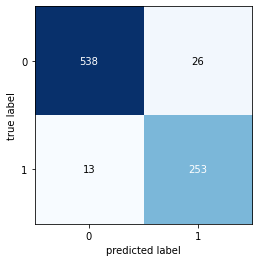

In [299]:
cf = metrics.confusion_matrix(y_train2, prediction_linear_train2,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [300]:
prediction_linear_test2 = classifier_linear2.predict(list(X_test2))
# results
print(classification_report(y_test2, prediction_linear_test2))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       143
           1       0.88      0.97      0.92        65

    accuracy                           0.95       208
   macro avg       0.93      0.95      0.94       208
weighted avg       0.95      0.95      0.95       208



[[134   9]
 [  2  63]]


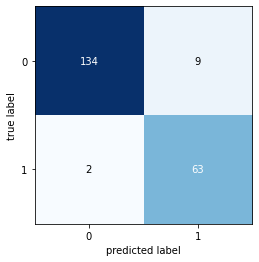

In [301]:
cf = metrics.confusion_matrix(y_test2,prediction_linear_test2,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()